In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.multivariate_normal

<function RandomState.multivariate_normal>

In [3]:
mean_1 = np.array([1, 0.5])
cov_1 = np.array([[1, 0.1], [0.1, 0.2]])

mean_2 = np.array([4, 5])
cov_2 = np.array([[1.2, 0.1], [0.1, 1.3]])

Essentially, these two sets of data will be used to create a binary classification problem, where the aim is to predict which set a new data point belongs to based on its features

In [4]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, 500)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, 500)

In [5]:
dist_1

array([[ 1.06663146,  0.95784356],
       [ 1.95705044,  0.19993034],
       [ 2.3829452 ,  0.55071479],
       [-1.88840483,  1.21765876],
       [ 2.22043454,  0.50492392],
       [ 0.47139992, -0.2306493 ],
       [ 0.61745348,  0.0116404 ],
       [ 1.65909714, -0.63090649],
       [ 0.35436843,  0.55253277],
       [ 0.50192885,  1.10774404],
       [ 2.27301588,  0.15302494],
       [ 1.24018576,  0.81687858],
       [ 2.33373653,  0.20553984],
       [ 1.10994302,  1.39693943],
       [ 0.03367974, -0.06221087],
       [ 1.41215505,  0.11562819],
       [-0.17374036,  0.54729157],
       [ 0.92598241,  0.38658337],
       [ 1.72129212,  0.03861521],
       [-0.39163631,  0.52465659],
       [ 1.70611296,  0.69056369],
       [ 0.39667128,  0.69149744],
       [ 0.1794305 , -0.29340493],
       [ 1.38579575,  0.79926358],
       [ 2.31949152,  0.3472746 ],
       [ 1.0242475 ,  0.26769376],
       [ 1.38461587,  1.26240923],
       [-0.56523819, -0.32169161],
       [-0.55517159,

That line of code generates two sets of random data points based on the means and covariance matrices that were defined earlier. Specifically, it generates 500 data points for each set using the np.random.multivariate_normal function, and assigns the resulting arrays to the variables dist_1 and dist_2.

These two arrays now represent the two sets of data points that will be used for the binary classification problem. dist_1 represents one set of data points that are normally distributed around mean_1, while dist_2 represents the other set of data points that are normally distributed around mean_2.

In [6]:
print(dist_1.shape, dist_2.shape)

(500, 2) (500, 2)


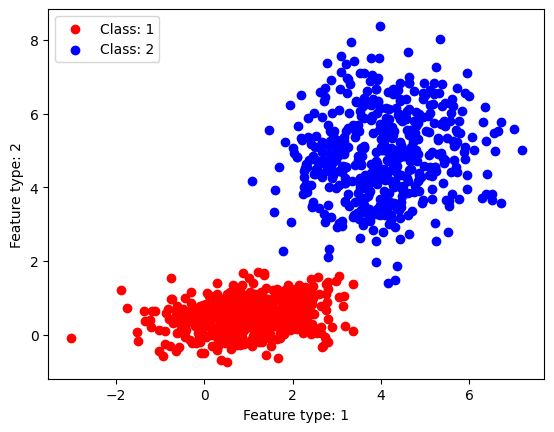

In [7]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], color = 'red', label = 'Class: 1')
plt.scatter(dist_2[:, 0], dist_2[:, 1], color = 'blue', label = 'Class: 2')
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.legend()
plt.show()

The plt.scatter function is used to create a scatter plot, where each data point is represented by a point on the graph. The first argument of this function specifies the x-coordinates of the data points (which are taken from the first column of dist_1 and dist_2), while the second argument specifies the y-coordinates of the data points (which are taken from the second column of dist_1 and dist_2).

In [8]:
dataset = np.zeros((1000, 3))
dataset[:500, :2] = dist_1
dataset[500:, :2] = dist_2

dataset[500:, -1] = 1
print(dataset[: 10])
print(dataset[: -10])

[[ 1.06663146  0.95784356  0.        ]
 [ 1.95705044  0.19993034  0.        ]
 [ 2.3829452   0.55071479  0.        ]
 [-1.88840483  1.21765876  0.        ]
 [ 2.22043454  0.50492392  0.        ]
 [ 0.47139992 -0.2306493   0.        ]
 [ 0.61745348  0.0116404   0.        ]
 [ 1.65909714 -0.63090649  0.        ]
 [ 0.35436843  0.55253277  0.        ]
 [ 0.50192885  1.10774404  0.        ]]
[[1.06663146 0.95784356 0.        ]
 [1.95705044 0.19993034 0.        ]
 [2.3829452  0.55071479 0.        ]
 ...
 [2.80415304 3.51883942 1.        ]
 [4.66925402 4.71875528 1.        ]
 [2.99293639 5.20469908 1.        ]]


This code block combines the two sets of data points (dist_1 and dist_2) into a single dataset that can be used for the binary classification problem.

The first line of code creates a NumPy array called dataset that has 1000 rows and 3 columns, with all elements initially set to 0.

The next two lines of code assign the first 500 rows of dataset to dist_1, and the remaining 500 rows to dist_2. Specifically, the first two columns of dataset are assigned the x and y coordinates of the data points from dist_1 and dist_2.

The last column of dataset is used to store the class labels for each data point. Since this is a binary classification problem, the class labels are either 0 or 1. The first 500 rows of the last column (corresponding to dist_1) are set to 0, while the last 500 rows (corresponding to dist_2) are set to 1.

The last two lines of code are used to print out the first and last 10 rows of dataset, so that you can inspect the data and verify that it has been constructed correctly.

In [9]:
np.random.shuffle(dataset)

This line of code shuffles the rows of the dataset array in a random order. This is important because it ensures that the data points are randomly ordered before splitting the dataset into training and testing sets, which helps to prevent any bias that might occur if the data was ordered in a specific way.

In [10]:
print(dataset[: 10])

[[ 0.63007846 -0.00872191  0.        ]
 [ 3.39025492  7.42972065  1.        ]
 [ 4.43742209  5.23380279  1.        ]
 [ 1.09159806  0.69194831  0.        ]
 [ 3.61657418  6.42950078  1.        ]
 [ 1.00564487  1.06689152  0.        ]
 [ 3.50983257  5.53856018  1.        ]
 [ 1.19846549 -0.1279933   0.        ]
 [ 0.04080604  0.82652787  0.        ]
 [ 1.73973366  0.73409862  0.        ]]


In [11]:
X_train = dataset[:800, :-1]
X_test = dataset[800:, :-1]

Y_train = dataset[:800, -1]
Y_test = dataset[800:, -1]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(800, 2) (800,) (200, 2) (200,)


1) The first part of the index (:800) specifies the range of rows to include in X_train, which is the first 800 rows of dataset. The second part of the index (:-1) specifies the range of columns to include in X_train, which is all columns except the last one.

Therefore, X_train has a shape of (800, 2), which means it has 800 rows (corresponding to the 800 training samples) and 2 columns (corresponding to the 2 features of the dataset).


Y_train is a vector that contains the class labels of the training set. In this code block, Y_train is created by taking the first 800 rows of the last column of dataset.

The first part of the index (:800) specifies the range of rows to include in Y_train, which is the first 800 rows of dataset. The second part of the index (-1) specifies the last column of dataset, which contains the class labels.

Therefore, Y_train has a shape of (800,), which means it has 800 elements (corresponding to the 800 training samples) and 1 dimension (since it is a vector).



This code block splits the shuffled dataset array into training and testing sets. The first two lines create the training set (X_train and Y_train) by taking the first 800 rows of dataset and excluding the last column (which contains the class labels) from X_train. The remaining rows (starting from row 800) are used to create the testing set (X_test and Y_test).

The print statement prints out the shapes of the training and testing sets, so that you can confirm that the data has been split correctly. Specifically, X_train should have a shape of (800, 2) (since there are 800 training samples and 2 features), Y_train should have a shape of (800,) (since there is one label for each training sample), X_test should have a shape of (200, 2) (since there are 200 testing samples and 2 features), and Y_test should have a shape of (200,) (since there is one label for each testing sample).

In [12]:
Y_test

array([1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.])

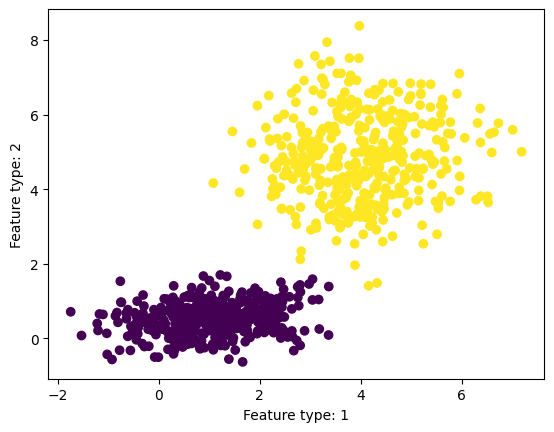

In [13]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train)
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.show()

The arguments to plt.scatter are:

X_train[:, 0]: This is the first column of X_train, which contains the values of the first feature for each training example. It is used as the x-coordinate of each data point in the scatter plot.

X_train[:, 1]: This is the second column of X_train, which contains the values of the second feature for each training example. It is used as the y-coordinate of each data point in the scatter plot.

c = Y_train: This sets the color of each data point based on its corresponding class label in Y_train. If Y_train is equal to 0, the data point will be colored according to the first color in the default color map (which is usually blue). If Y_train is equal to 1, the data point will be colored according to the second color in the default color map (which is usually orange).

Therefore, this scatter plot visualizes the distribution of the training data in the feature space, with points colored according to their class labels. It can help you to understand how the classes are separated or overlapping in the feature space, which is useful for understanding the performance of the logistic regression classifier that will be trained on this data.

In [14]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)
print(mean, std)

[2.54079556 2.72923266] [1.79256672 2.34393348]


In this code block, mean and std are calculated for the training set X_train.

mean = X_train.mean(axis=0): This computes the mean of each feature in the training set. The axis=0 parameter indicates that the mean should be calculated over the rows (i.e., for each feature separately). The resulting mean array has the same shape as the number of features in X_train.
std = X_train.std(axis=0): This computes the standard deviation of each feature in the training set. The axis=0 parameter indicates that the standard deviation should be calculated over the rows (i.e., for each feature separately). The resulting std array has the same shape as the number of features in X_train.

In [15]:
X_train = (X_train - mean)/std

# Standardizing the data in this way can be helpful for some machine learning algorithms, such as logistic regression, because it ensures that each feature has a similar scale. This can make it easier for the algorithm to learn the weights for each feature, and can improve the accuracy of the model.

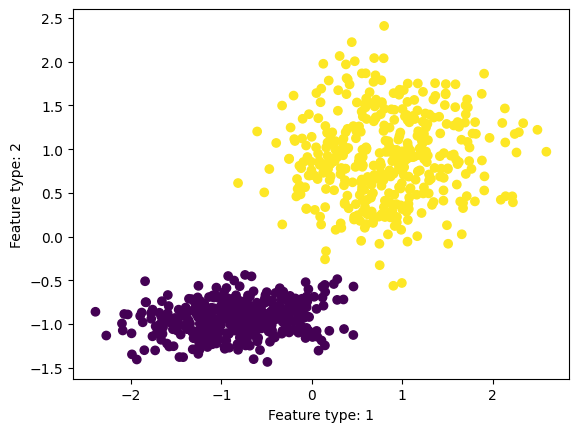

In [16]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train)
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.show()

In [17]:
X_test = (X_test - mean)/std

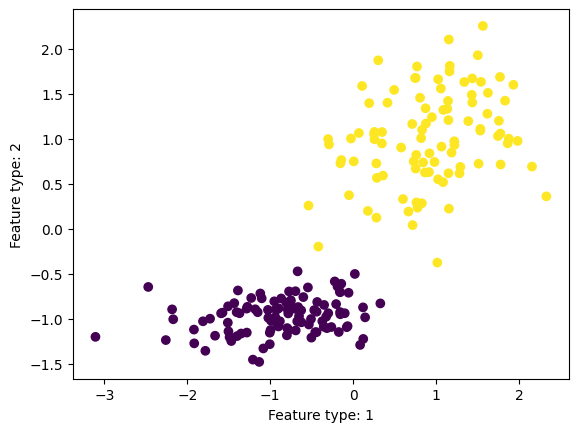

In [18]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test)
plt.xlabel('Feature type: 1')
plt.ylabel('Feature type: 2')
plt.show()

In [19]:
print(X_train.std())

1.0000000000000002


In [20]:
def sigmoid(X):
    return 1.0/(1.0 + np.exp(-X))

This function is an implementation of the sigmoid function, which is commonly used in logistic regression. The sigmoid function takes any real-valued number as input and outputs a value between 0 and 1.

The formula for the sigmoid function is:

sigmoid(x) = 1 / (1 + exp(-x))
where exp(x) is the exponential function of x.

In this implementation, the input X can be a scalar or an array. The function applies the sigmoid function element-wise to X using the NumPy exp() function. The resulting output is an array of the same shape as X where each element is the sigmoid of the corresponding element in X.

In [21]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

This function is an implementation of the hypothesis function for logistic regression. The hypothesis function takes as input a feature vector X and a weight vector theta, and outputs the predicted probability that the target variable is positive, given the values of the features.

In logistic regression, the hypothesis function is defined as:

h_theta(x) = sigmoid(theta^T * x)
where x is a feature vector, theta is the weight vector, theta^T is the transpose of theta, and sigmoid() is the sigmoid function.

In this implementation, the function first computes the dot product of the feature vector X and the weight vector theta using NumPy's dot() function. The resulting value is then passed through the sigmoid() function to get the predicted probability. The output is a scalar value representing the predicted probability of the positive class.

In [22]:
random_values = np.linspace(-300, 300, 20)

This line of code generates an array of 20 evenly spaced numbers between -300 and 300, inclusive.

The linspace() function from NumPy is used to achieve this. The function takes three arguments: the starting value of the sequence, the ending value of the sequence, and the number of elements to generate between them. In this case, the starting value is -300, the ending value is 300, and 20 elements are generated in between.

The resulting array random_values can be used to initialize the values of the weight vector theta in logistic regression, in order to try different initializations and see how they affect the performance of the algorithm.

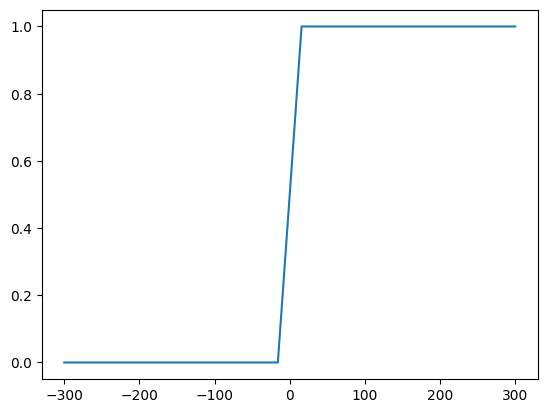

In [23]:
plt.plot(random_values, sigmoid(random_values))

# This line of code generates a plot of the sigmoid function for the values in the random_values array.

# The sigmoid() function takes a scalar or an array as input and applies the sigmoid transformation element-wise
# to the input, resulting in an output in the range (0, 1).

# The plot() function from Matplotlib is used to plot the output of the sigmoid() function against the values in
# random_values. The result is a plot with the random_values on the x-axis and the output of the sigmoid 
# function on the y-axis.

# The resulting plot shows the characteristic S-shaped curve of the sigmoid function, with output values close 
# to 0 or 1 for extreme input values and a smooth transition in between.





In [24]:
def cost_function(X, Y, theta):
    h_theta = hypothesis(X, theta)
    cost = np.mean(Y*np.log(h_theta) + (1 - Y)*np.log(1-h_theta))
    cost = cost*-1

    return cost


# This code defines a Python function cost_function that computes the cost function for logistic regression. The 
# cost function is a measure of how well the logistic regression model fits the training data, and it is used to
# optimize the values of the model parameters (the weight vector theta).

# The cost_function takes three arguments:

# X: a numpy array of shape (m, n), where m is the number of training examples and n is the number of features 
#     (excluding the bias term). This array represents the input features of the training examples
        
# Y: a numpy array of shape (m,) representing the target labels for the training examples.

# theta: a numpy array of shape (n+1,) representing the weight vector of the logistic regression model.

# The function first computes the hypothesis function h_theta for the input features X and the weight vector 
# theta, using the hypothesis() function defined earlier. The hypothesis function returns the predicted 
# probabilities of the positive class for each training example.

# The cost function is then returned as a scalar value.

In [25]:
def gradient(X, Y, theta):

    h_theta = hypothesis(X, theta)

    grad = np.dot(X.T, (Y-h_theta))

    return grad/X.shape[0]

# it returns the gradient, which is a vector of shape (n,). The division by X.shape[0] is included to normalize
# the gradient.

In [26]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 500):

    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost_function(X, Y, theta)
        cost_epoch.append(e)

        theta = theta + learning_rate * grad

    return (theta, cost_epoch)

# This function implements the gradient descent algorithm to optimize the parameters (theta) of a logistic 
# regression model.

# The function initializes the theta parameters as an array of zeros with dimensions (n,1), where n is the 
# number of features. It then iterates for max_steps number of times and at each iteration:

# Finally, the function returns the optimized theta parameters and a list of the cost of the model over each 
# epoch.

In [27]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
print(X_train[:4, :4], X_train.shape)
Y_train = Y_train.reshape((-1, 1))

[[ 1.         -1.06591128 -1.1681025 ]
 [ 1.          0.4738788   2.00538455]
 [ 1.          1.05805073  1.06853294]
 [ 1.         -0.80844829 -0.86917328]] (800, 3)


In the code above, we first create a matrix of ones with the shape (800, 1) using the NumPy function ones(). This is done because the first column of the feature matrix needs to be a column of ones, which will be used to account for the bias term in the logistic regression model.

Then, we use the NumPy function hstack() to horizontally stack the column of ones to the feature matrix X_train. This operation is done by passing a tuple with the two matrices to be stacked. The resulting matrix is then stored back in X_train.

Finally, we reshape the target vector Y_train using the NumPy function reshape(). This function is used to change the shape of an array, in this case, we want to reshape Y_train from a 1D array of shape (800,) to a 2D array of shape (800, 1). This is done to make sure that the matrix operations in the logistic regression model are done correctly.

|-------------------------------------------------------------------------------------------------------------|
|-------------------------------------------------------------------------------------------------------------|
|-------------------------------------------------------------------------------------------------------------|


In the above code, a column vector of ones is created using the ones function of the NumPy module. The shape of the ones matrix is (X_train.shape[0], 1) where X_train.shape[0] is the number of rows in the X_train matrix, i.e., the number of training examples.

The hstack function of NumPy is used to horizontally stack the ones matrix and the X_train matrix. This is done by passing a tuple of matrices (ones, X_train) as the argument to the hstack function. This creates a new matrix where the ones matrix is added as the first column to the X_train matrix.

Finally, the Y_train matrix is reshaped to a column vector with shape (-1, 1). This is done to ensure that the dimensions of Y_train and theta match during the calculation of the hypothesis and cost function.

In [28]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.1, max_steps = 1000)


# Here, the gradient_descent function is called with X_train and Y_train as input along with the learning_rate and
# max_steps hyperparameters. This function returns two outputs theta and cost_epoch.

# theta is the vector of parameters or weights that the algorithm has learned to predict the output. It is the 
# solution to the optimization problem that was solved during the gradient descent algorithm.

# cost_epoch is a list that contains the value of the cost function at each iteration of the gradient descent 
# algorithm. This can be used to visualize the performance of the algorithm and to ensure that the cost is 
# decreasing with each iteration, as expected.

In [29]:
theta

array([[0.44101441],
       [2.45203507],
       [3.6463238 ]])

In [30]:
# cost_epoch

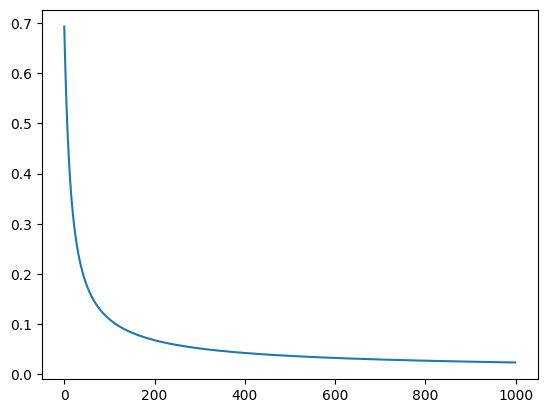

In [31]:
plt.plot(cost_epoch)

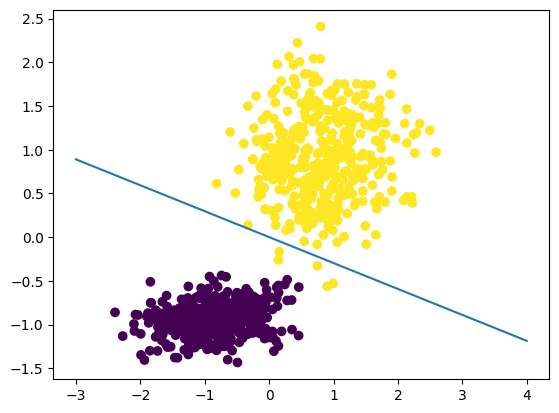

In [32]:
x1 = np.arange(-3, 5)

x2 = -(theta[0] * theta[1]*x1/theta[2])

# x1 is a 1D numpy array created by generating values between -3 and 5 with an increment of 0.1. These values are
# used as the x-coordinates of the points on the decision boundary line.

# x2 is a 1D numpy array that contains the y-coordinates of the points on the decision boundary line. It is
# obtained by rearranging the logistic regression model equation:

# x1 and x2 are the two feature types, and theta_0, theta_1, and theta_2 are the parameters of the logistic 
# regression model.


plt.scatter(X_train[:, 1], X_train[:, 2], c = Y_train)
plt.plot(x1, x2)

In [33]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test[:4, :4], X_test.shape)
Y_test = Y_test.reshape((-1, 1))

# This code adds a column of ones to the X_test numpy array using np.ones() and np.hstack().

# First, a new numpy array of ones is created using np.ones((X_test.shape[0], 1)). The shape attribute of the 
# X_test numpy array is used to determine the number of rows needed for the ones array. The second argument of 
# np.ones() specifies the number of columns in the new array, which is 1 in this case.

# Then, the two arrays are stacked horizontally using np.hstack((ones, X_test)). This results in a new numpy 
# array where the column of ones is added to the left of the X_test array. The resulting array has a shape of 
# (200, 3), which means it has 200 rows (corresponding to the number of examples in the test set) and 3 columns 
# (corresponding to the intercept and two features in the logistic regression model).

# Finally, the Y_test numpy array is reshaped to have a single column using the reshape() method with -1 as the
# first argument and 1 as the second argument. The -1 argument means that numpy should determine the size of the
# first dimension automatically based on the size of the input array, while the 1 argument specifies the desired
# size of the second dimension.

[[ 1.          0.73056986  0.75074966]
 [ 1.         -0.32490911 -0.97566316]
 [ 1.         -0.2213129  -0.58352325]
 [ 1.          1.62640483  1.51281188]] (200, 3)


In [34]:
def predict(X, theta):
    h_theta = hypothesis(X, theta)
    output = np.zeros(h_theta.shape)

    output[h_theta>0.5] = 1
    output = output.astype('int')

    return output

# The predict function takes in two arguments:

# X: The input features for which the prediction is to be made. This can be a single input or a batch of inputs.
# theta: The learned weights of the logistic regression model.
# The function first calculates the hypothesis of the logistic regression model on the input features using the
# hypothesis function.

# Then, it initializes an output array to all zeros with the same shape as the hypothesis array. For each value
# in the hypothesis array, if the value is greater than 0.5, it sets the corresponding value in the output array
# to 1. Otherwise, it leaves the corresponding value in the output array as 0.

# Finally, it returns the output array as the predicted values for the given input features.

In [35]:
train_preds = predict(X_train, theta)
test_preds = predict(X_test, theta)

# In logistic regression, the goal is to predict the probability of an instance belonging to a certain class. 
# Once we obtain the model parameters (i.e., theta), we can use them to make predictions on the training set and
# the test set.

# The predict function takes two arguments: the input data X and the model parameters theta. It first uses the
#     hypothesis function to calculate the predicted probabilities of the input data belonging to the positive
#     class (i.e., Y=1). Then, it creates an output array of zeros and sets the elements with probabilities
#     greater than 0.5 to 1 (indicating that the instance is predicted to be in the positive class), and the
#     remaining elements to 0 (indicating that the instance is predicted to be in the negative class). Finally,
#     the function returns the output array as the predictions.

# The train_preds and test_preds variables are obtained by calling the predict function on the X_train and X_test
# data, respectively, using the theta model parameters obtained from gradient descent. These variables contain
# the predicted classes for the instances in the training set and the test set, respectively.

In [36]:
for i in range(len(test_preds)):
    print(test_preds[i], Y_test[i])

[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[

In [37]:
def accuracy(preds, labels):
    labels = labels.astype('int')
    print(np.sum(preds == labels)/labels.shape[0])
    
# The accuracy function computes the accuracy of the predicted labels with respect to the true labels. It takes
# two inputs: preds and labels. preds is a 1D numpy array containing the predicted labels and labels is a 1D 
#     numpy array containing the true labels.

# The function first converts the data type of labels to 'int' to ensure consistency with preds. Then, it 
# computes the number of correctly predicted labels by comparing the predicted labels with the true labels 
# using the == operator. The np.sum function is used to count the number of True values in the resulting Boolean
# array, which corresponds to the number of correctly predicted labels. Finally, the function divides the number
# of correctly predicted labels by the total number of labels to compute the accuracy and prints the result.

In [38]:
accuracy(test_preds, Y_test)

0.995


In [39]:
accuracy(train_preds, Y_train)

0.99875


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train, Y_train.reshape((-1, )))

LogisticRegression()

In [52]:
theta_0 = model.intercept_
theta_r = model.coef_

In [53]:
print(theta_0, theta_r)

[0.86855817] [[4.23865847e-07 2.20144223e+00 4.82245220e+00]]


In [54]:
model.score(X_train, Y_train.reshape((-1, )))

0.99875

In [55]:
model.score(X_test, Y_test.reshape((-1, )))

1.0

In [56]:
y_pred = model.predict(X_test)

In [57]:
y_pred

array([1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.])